**web scrapping**: https://youtu.be/NBuED2PivbY?si=wzxm4_pf8kQyS-vw

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, utils, models, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import image as mpimg, pyplot as plt
from glob import glob
# from tensorflow.keras.applications import InceptionV3
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Data Augmentation 

In [110]:
train_augmentor = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [111]:
train_gen = train_augmentor.flow_from_directory(
    'train',
    target_size=(240,240),
    batch_size=32,
    class_mode='sparse'
)

Found 4050 images belonging to 90 classes.


In [112]:
val_augmentor = ImageDataGenerator(rescale=1./255)

In [113]:
val_gen = val_augmentor.flow_from_directory(
    'valid',
    target_size=(240, 240),
    batch_size=32,
    class_mode='sparse'
)

Found 1350 images belonging to 90 classes.


In [114]:
data_cat = list(train_gen.class_indices.keys())

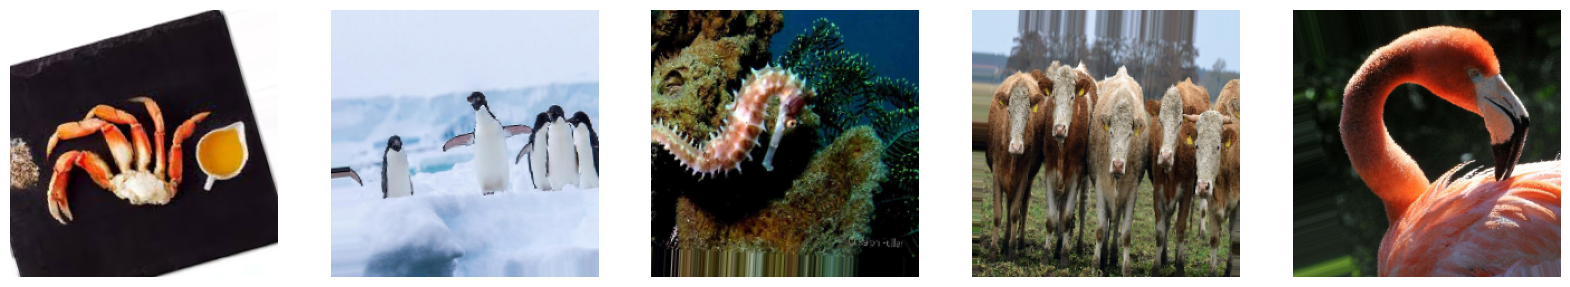

In [66]:
sample_images, _ = next(train_gen)
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for img, ax in zip(sample_images[:5], axes):
    ax.imshow(img)
    ax.axis('off')
plt.show()

### Architecture of The CNN

In [13]:
model = models.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2), #to reduce overfitting
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [15]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

### Training the model

In [16]:
img_classifier = model.fit(
    train_gen,
    epochs=30,
    validation_data=val_gen,
    callbacks=[lr_scheduler,early_stopping]
)

Epoch 1/30


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


127/127 ━━━━━━━━━━━━━━━━━━━━ 101s 745ms/step - accuracy: 0.0196 - loss: 4.9227 - val_accuracy: 0.0333 - val_loss: 4.3965 - learning_rate: 0.0010
Epoch 2/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 99s 750ms/step - accuracy: 0.0577 - loss: 4.1999 - val_accuracy: 0.0800 - val_loss: 4.0758 - learning_rate: 0.0010
Epoch 3/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 98s 744ms/step - accuracy: 0.1007 - loss: 3.8899 - val_accuracy: 0.1081 - val_loss: 3.9307 - learning_rate: 0.0010
Epoch 4/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 97s 740ms/step - accuracy: 0.1382 - loss: 3.6462 - val_accuracy: 0.1215 - val_loss: 4.0476 - learning_rate: 0.0010
Epoch 5/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 101s 770ms/step - accuracy: 0.1838 - loss: 3.4354 - val_accuracy: 0.1763 - val_loss: 3.6365 - learning_rate: 0.0010
Epoch 6/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 103s 785ms/step - accuracy: 0.2230 - loss: 3.2118 - val_accuracy: 0.1904 - val_loss: 3.5770 - learning_rate: 0.0010
Epoch 7/30
127/127 ━━━━━━━━━━━━━━━━━━━━ 104s 791ms/step - accuracy: 0.2493 - l

In [19]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 240, 240, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 120, 120, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 120, 120, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 60, 60, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 90)             │        11,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,224,368 (84.78 MB)

 Trainable params: 7,408,122 (28.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,816,246 (56.52 MB)

None


## Model Evalution

In [95]:
acc = img_classifier.history['accuracy']
val_acc = img_classifier.history['val_accuracy']
loss = img_classifier.history['loss']
val_loss = img_classifier.history['val_loss']
epochs = range(len(acc))

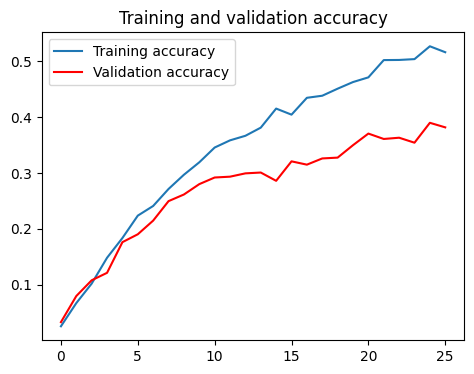

In [96]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, color='red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [144]:
loss, accuracy = model.evaluate(val_gen,verbose=1)
print(f'Validation accuracy of the model: {accuracy*100:.2f}%')

43/43 ━━━━━━━━━━━━━━━━━━━━ 16s 366ms/step - accuracy: 0.3674 - loss: 2.8817
Validation accuracy of the model: 37.04%


In [120]:
unseen_data = glob('unseen test data/*')
x=0

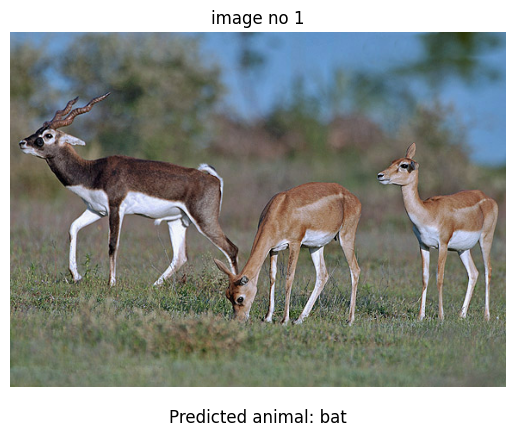

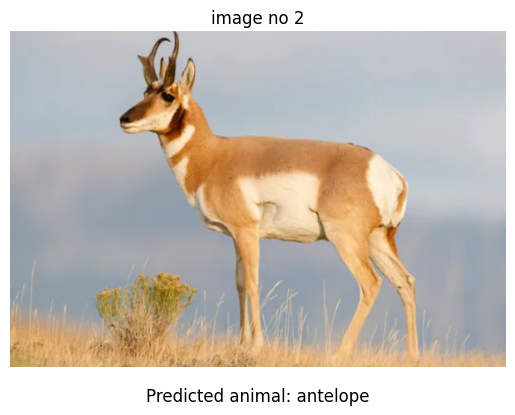

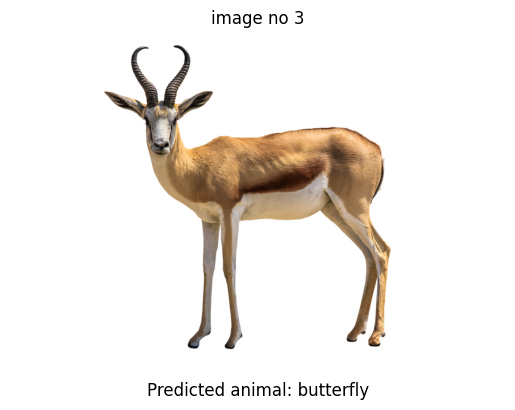

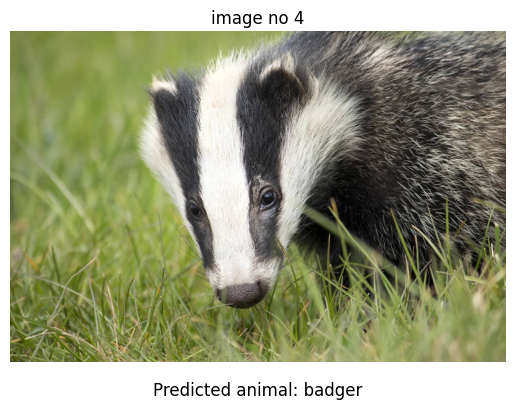

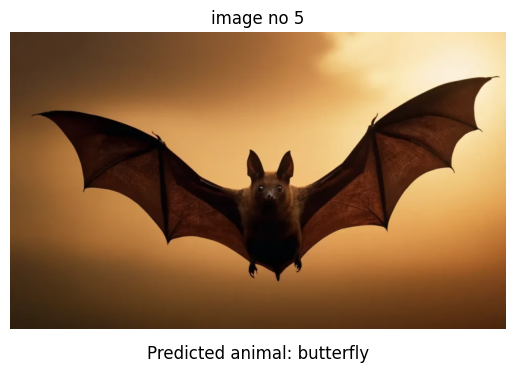

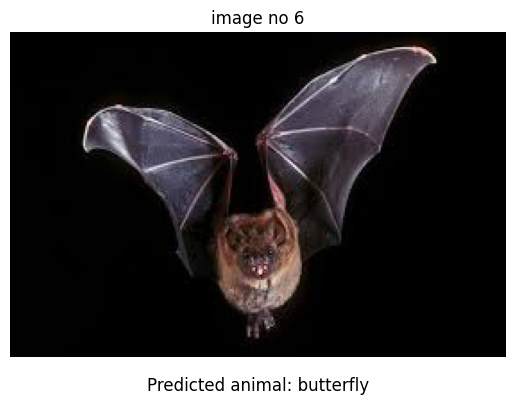

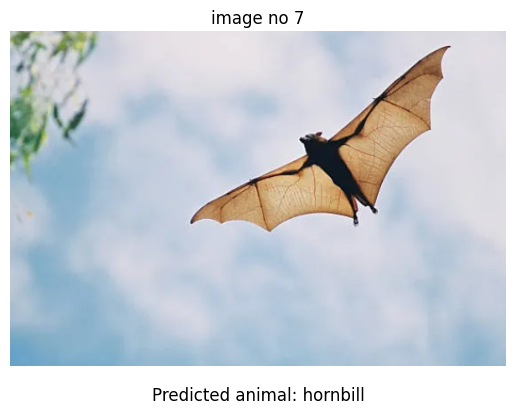

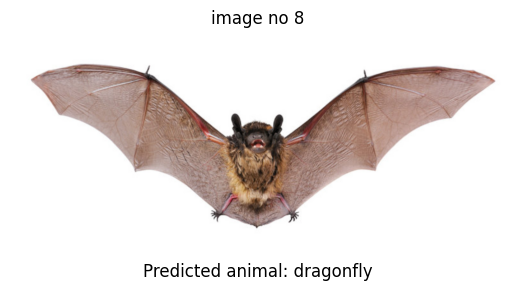

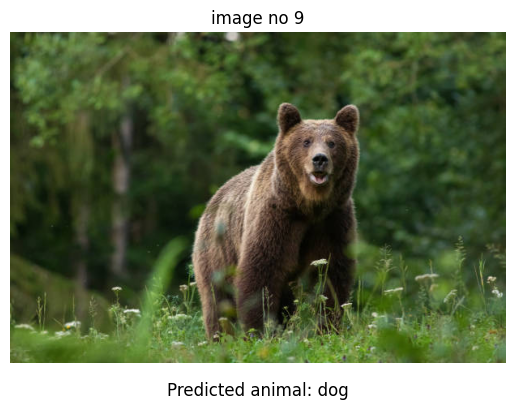

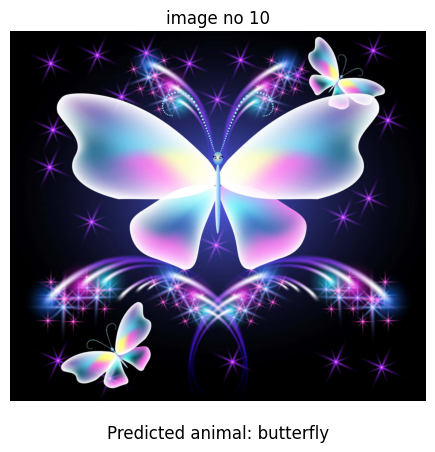

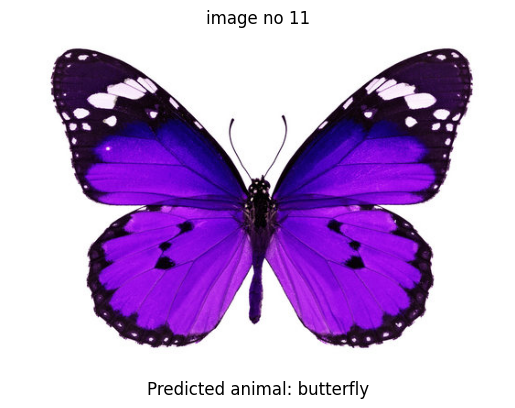

In [150]:
for i in unseen_data:
    plt.title(f"image no {(x:=x+1)}")
    plt.imshow(mpimg.imread(i))
    plt.axis('off')
    predict = model.predict(
        tf.expand_dims(
            utils.array_to_img(
                utils.load_img(i, target_size=(240,240))
                )
            ,0)
        , verbose=0)
    score=tf.nn.softmax(predict)
    plt.text(0.5, -0.1, f'Predicted animal: {data_cat[np.argmax(score)]}',size=12, ha='center',transform=plt.gca().transAxes)
    plt.show()


The model predicted 4 out of 11 images (image no 2, 4, 10 and 11) correctly.

In [140]:
model.save('anidex.keras')